In [234]:
## DATA CLEANING ##

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [236]:
file = "/Users/mdcummings/Desktop/Data Analysis/Common Code/new.csv"

In [237]:
df = pd.read_csv(file)

In [238]:
df

,First Name,Last Name,SSN,age
0,Caleb,Frost,505-80-2901,84
1,John,NaN,504-55-1515,88
2,Rocky,Lake,533-84-2931,33
3,Gary,Springer,838-11-2901,64
4,Hector,Frost,505-25-2901,12
5,Opera,Winfried,N/a,74
6,Maui,Rostropovich,377-80-2901,54
7,Annie,Oakley,288-48-9989,22
8,Loki,Oakley,933-55-5612,38
9,Hannah,Banana,505-12-7483,31


In [249]:
# Understand the data types in each column
df.dtypes


First Name    object
Last Name     object
age            int64
dtype: object

In [239]:
# Describe the data
df.describe()

,age
count,10.000000
mean,50.000000
std,26.687492
min,12.000000
25%,31.500000
50%,46.000000
75%,71.500000
max,88.000000


In [240]:
# How many null values in each column?
df.isnull().sum()

First Name    0
Last Name     1
SSN           0
age           0
dtype: int64

In [241]:
# Identifying the different sorts of null values
missing_value = ["N/a", "na", "n/a", "n/A", np.nan]
df = pd.read_csv(file, na_values = missing_value)

In [242]:
# How many of all variations of null are there per column
df.isnull().sum()

First Name    0
Last Name     1
SSN           1
age           0
dtype: int64

<AxesSubplot:>

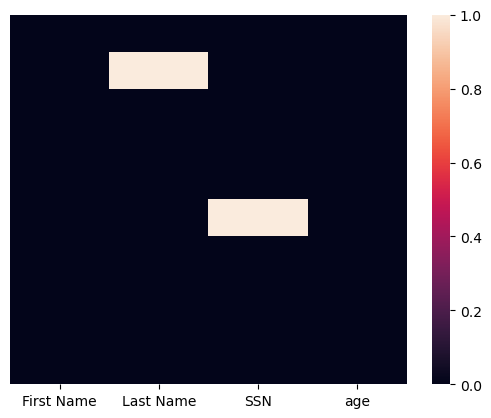

In [243]:
# Plot a heat map showing the null values
sns.heatmap(df.isnull(), yticklabels=False)

In [244]:
# Remove null values
df = df.dropna()
df

,First Name,Last Name,SSN,age
0,Caleb,Frost,505-80-2901,84
2,Rocky,Lake,533-84-2931,33
3,Gary,Springer,838-11-2901,64
4,Hector,Frost,505-25-2901,12
6,Maui,Rostropovich,377-80-2901,54
7,Annie,Oakley,288-48-9989,22
8,Loki,Oakley,933-55-5612,38
9,Hannah,Banana,505-12-7483,31


<AxesSubplot:>

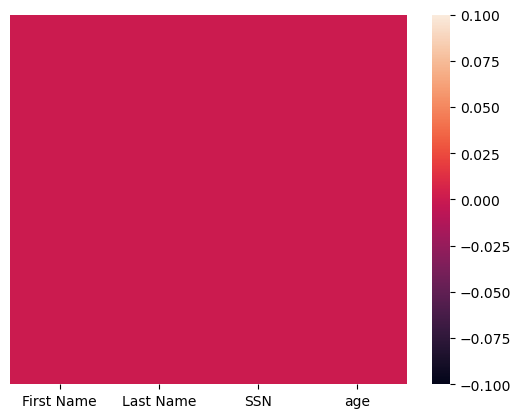

In [245]:
# Plot a heat map verifying the null values are removed
sns.heatmap(df.isnull(), yticklabels=False)

In [246]:
# Group the DataFrame by Last Name to see any duplicates
df_engine = df.groupby('Last Name').count()
df_engine

,First Name,SSN,age
Last Name,,,
Banana,1,1,1
Frost,2,2,2
Lake,1,1,1
Oakley,2,2,2
Rostropovich,1,1,1
Springer,1,1,1


In [247]:
# Get some statistics (can also include, 'min', 'max', 'mean')
df.groupby('Last Name').age.agg(['mean'])

,mean
Last Name,
Banana,31.0
Frost,48.0
Lake,33.0
Oakley,30.0
Rostropovich,54.0
Springer,64.0


In [248]:
# Drop any unnecessary columns ('number')
df = df.drop('SSN', axis=1)
df

# df = df.drop('column_name', axis=1)
# where 1 is the axis number (0 for rows and 1 for columns.)

# Or, the drop() method accepts index/columns keywords as an alternative to specifying the axis. So we can now just do:

# df = df.drop(columns=['column_nameA', 'column_nameB'])

,First Name,Last Name,age
0,Caleb,Frost,84
2,Rocky,Lake,33
3,Gary,Springer,64
4,Hector,Frost,12
6,Maui,Rostropovich,54
7,Annie,Oakley,22
8,Loki,Oakley,38
9,Hannah,Banana,31


In [224]:
## DATA NORMALIZATION ##

# Three most common forms 

# first normal form 1nf 
#     goes from raw data to first normal form where each row is unique
# second normal form 2nf
    # starts breaking things up into relational tables. 
    # ex) One big table broken up into three tables that share no data
    # unique identifier for each row and all columns are dependent on primary key
# third normal form 2nf
    # Separate tables for each column without any connection to another table

In [ ]:
# TRANSITIVE DEPENDENCY #
# if A == B and B == C then A == C
# one value relies on another